In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing, cluster, tree
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [3]:
data = pd.read_csv('data1.csv')

In [4]:
#Group relations
data_list = ['USED_GG_AMOUNT', 'TENURE', 'AGE' , 'GG_packages']
#region_data = [data_list + ['REGION2']]
data.groupby(data_list)['TENURE'].sum()

USED_GG_AMOUNT  TENURE  AGE  GG_packages                      
30              8       29   Аялгуут мэндчилгээ 1 сар ашиглах      8
                        100  Аялгуут мэндчилгээ 1 сар ашиглах      8
                20      53   Аялгуут мэндчилгээ 1 сар ашиглах     20
                40      47   Аялгуут мэндчилгээ 1 сар ашиглах     40
                46      21   Аялгуут мэндчилгээ 1 сар ашиглах     46
                                                                  ..
500             35      39   Сүлжээндээ 50 минут ярих             35
                37      51   Сүлжээндээ 50 минут ярих             37
                64      31   Сүлжээндээ 50 минут ярих             64
                73      32   Сүлжээндээ 50 минут ярих             73
                75      29   Сүлжээндээ 50 минут ярих             75
Name: TENURE, Length: 2470, dtype: int64

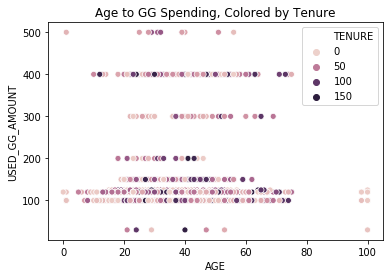

In [5]:
#Age vs USED_GG_AMOUNT vs TENURE relation
sns.scatterplot('AGE', 'USED_GG_AMOUNT', hue='TENURE', data=data);
plt.title('Age to GG Spending, Colored by Tenure');
plt.show()

In [6]:
data.describe().round(2)

,PHONE_NO,TENURE,AGE,USED_GG_AMOUNT
count,2979.00,2979.00,2979.00,2979.00
mean,87532129.77,41.10,33.77,147.17
std,2829537.08,34.11,12.96,87.20
min,80002366.00,0.00,0.00,30.00
25%,88005915.00,10.00,25.00,120.00
50%,88558899.00,32.00,31.00,120.00
75%,89035365.50,63.00,41.00,120.00
max,89999931.00,124.00,100.00,500.00


In [7]:
data.head()

,Activated_date,PHONE_NO,PRODUCT_TYPE,TENURE,Location,REGION2,AGE,GG_packages,USED_GG_AMOUNT
0,2017-01-06,88465875,Happy Life,65,Rural,ZAV,37,Сүлжээндээ 10 минут ярих,100
1,2017-01-01,80041119,Hybrid 15000,3,Ulaanbaatar,CH,43,50МВ дата багц ашиглах,120
2,2017-01-02,89653006,Smart Days,9,Rural,UVH,1,Сүлжээндээ 10 минут ярих,100
3,2017-01-03,88951018,Smart Days,23,Ulaanbaatar,BG,18,50МВ дата багц ашиглах,120
4,2017-01-08,89811220,Happy Life,54,Rural,DOR,51,Сүлжээндээ 30 минут ярих,300


In [8]:
data1 = data.copy()

In [9]:
#Transform the data
data1 = data

#converting str to categories
data1.productType = pd.Categorical(data.PRODUCT_TYPE)
data1['product_type'] = data1.productType.codes

data1.location = pd.Categorical(data.Location)
data1['location'] = data1.location.codes

data1.region = pd.Categorical(data.REGION2)
data1['region'] = data1.region.codes

data1.gg_packages = pd.Categorical(data.GG_packages)
data1['region'] = data.gg_packages.codes

spend_q = pd.qcut(data['USED_GG_AMOUNT'].rank(method='first'), q = 4, labels=range(1,5))
data1['Spend_qartile'] = spend_q
data1.sort_values('USED_GG_AMOUNT')

data1.drop(['PRODUCT_TYPE', 'Location', 'REGION2', 'GG_packages'], axis=1, inplace=True)


/Users/Khaliun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
/Users/Khaliun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/Users/Khaliun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # This is added back by InteractiveShellApp.init_path()
/Users/Khaliun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/p

In [10]:
data1.head()

,Activated_date,PHONE_NO,TENURE,AGE,USED_GG_AMOUNT,product_type,location,region,Spend_qartile
0,2017-01-06,88465875,65,37,100,10,0,5,1
1,2017-01-01,80041119,3,43,120,13,1,1,1
2,2017-01-02,89653006,9,1,100,23,0,5,1
3,2017-01-03,88951018,23,18,120,23,1,1,1
4,2017-01-08,89811220,54,51,300,10,0,7,4


In [11]:
#Recency
r_labels = list(range(4,0,-1))
activated_object = [datetime.datetime.strptime(date, '%Y-%m-%d').date() for date in data['Activated_date']]
snapshot_date = max(activated_object) + datetime.timedelta(days=1)
#data1['recency'] = (snapshot_date - data['Activated_date']).days
#recency_q = pd.qcut(data['Activated_date'], q=4, labels =r_labels)

In [12]:
#data2 = data1.groupby(['PHONE_NO']).agg(
  #  'Activated_date' = [lambda x : (snapshot_date - x.max()).days]) 

In [13]:
data2 = data1.copy()
data2.drop(['PHONE_NO','Activated_date', 'Spend_qartile'], axis=1, inplace=True)

In [14]:
data2.describe().round(2)

,TENURE,AGE,USED_GG_AMOUNT,product_type,location,region
count,2979.00,2979.00,2979.00,2979.00,2979.00,2979.00
mean,41.10,33.77,147.17,19.28,0.56,2.39
std,34.11,12.96,87.20,7.25,0.50,2.15
min,0.00,0.00,30.00,-1.00,-1.00,0.00
25%,10.00,25.00,120.00,17.00,0.00,1.00
50%,32.00,31.00,120.00,23.00,1.00,1.00
75%,63.00,41.00,120.00,24.00,1.00,5.00
max,124.00,100.00,500.00,30.00,1.00,10.00


In [15]:
data2.head()

,TENURE,AGE,USED_GG_AMOUNT,product_type,location,region
0,65,37,100,10,0,5
1,3,43,120,13,1,1
2,9,1,100,23,0,5
3,23,18,120,23,1,1
4,54,51,300,10,0,7


In [16]:
#Normalize the data
scaler = StandardScaler()
scaler.fit(data2)
data_normalized = scaler.transform(data2)

In [17]:
print('mean : ', data_normalized.mean(axis=0).round(2))
print('std: ', data_normalized.std(axis=0).round(2))

mean :  [-0. -0. -0. -0. -0. -0.]
std:  [1. 1. 1. 1. 1. 1.]


In [18]:
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_

data_k2 = data2.assign(Cluster = cluster_labels)
'''data_k2.groupby(['Cluster']).agg(
    'TENURE' : ['mean', 'count'],
    'AGE' : 'mean',
    'Spend_quartile' : 'mean',
    'product_type' : 'mean',
    'region' : 'mean'
)'''

data_k2.groupby(['Cluster']).agg(
    ['mean', 'count']
)

TENURE              AGE       USED_GG_AMOUNT       product_type  \
              mean count       mean count           mean count         mean   
Cluster                                                                       
0        27.569246  2029  33.494332  2029     138.632331  2029    23.306062   
1        69.992632   950  34.360000   950     165.410526   950    10.672632   

               location          region        
        count      mean count      mean count  
Cluster                                        
0        2029  0.506161  2029  2.317398  2029  
1         950  0.675789   950  2.557895   950

In [19]:
#Optimize Cluster using Elbos method
sse = {}
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_

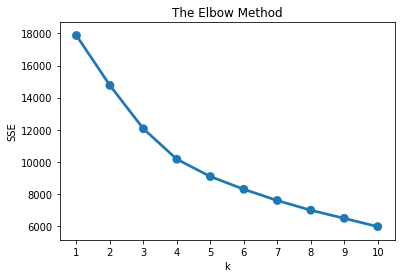

In [20]:
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y = list(sse.values()))
plt.show()

In [21]:
#Experiment clusters based on the elbow k=3
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_

data_k2 = data2.assign(Cluster = cluster_labels)

data_k2.groupby(['Cluster']).agg(
    ['mean', 'count']
)

TENURE              AGE       USED_GG_AMOUNT       product_type  \
              mean count       mean count           mean count         mean   
Cluster                                                                       
0        27.569246  2029  33.494332  2029     138.632331  2029    23.306062   
1        69.992632   950  34.360000   950     165.410526   950    10.672632   

               location          region        
        count      mean count      mean count  
Cluster                                        
0        2029  0.506161  2029  2.317398  2029  
1         950  0.675789   950  2.557895   950

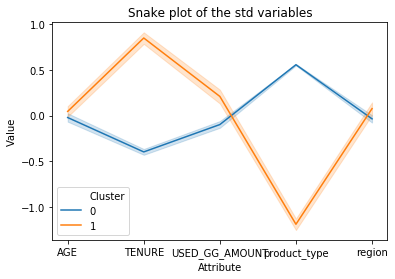

In [22]:
#transform data to prepare snakeplot for k=2
data_normalized = pd.DataFrame (data_normalized,
                               index = data2.index,
                               columns=data2.columns)
data_normalized['Cluster'] = data_k2['Cluster']

data_melt = pd.melt(data_normalized.reset_index(),
                   id_vars=['Cluster'],
                   value_vars = ('TENURE', 'AGE', 'USED_GG_AMOUNT', 'product_type', 'region'),
                    var_name='Attribute',
                    value_name='Value')

#snake plot
plt.title('Snake plot of the std variables')
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=data_melt)

In [23]:
#Experiment clusters based on the elbow k=3
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_

data_k3 = data2.assign(Cluster = cluster_labels)

data_k3.groupby(['Cluster']).agg(
    ['mean', 'count']
)

TENURE              AGE       USED_GG_AMOUNT       product_type  \
              mean count       mean count           mean count         mean   
Cluster                                                                       
0        72.013699   803  34.159402   803     121.967621   803    11.069738   
1        45.915194   283  36.204947   283     403.886926   283    15.844523   
2        27.263603  1893  33.241416  1893     119.484945  1893    23.272055   

               location          region        
        count      mean count      mean count  
Cluster                                        
0         803  0.663761   803  2.981320   803  
1         283  0.618375   283  0.349823   283  
2        1893  0.507660  1893  2.450608  1893

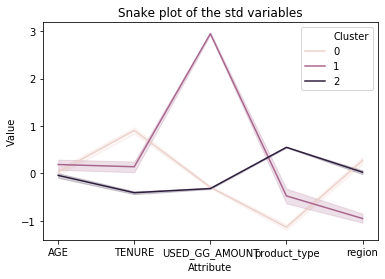

In [24]:
#transform data to prepare snakeplot for k=3
data_normalized = pd.DataFrame (data_normalized,
                               index = data2.index,
                               columns=data2.columns)
data_normalized['Cluster'] = data_k3['Cluster']

data_melt = pd.melt(data_normalized.reset_index(),
                   id_vars=['Cluster'],
                   value_vars = ('TENURE', 'AGE', 'USED_GG_AMOUNT', 'product_type', 'region'),
                    var_name='Attribute',
                    value_name='Value')

#snake plot
plt.title('Snake plot of the std variables')
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=data_melt)

In [25]:
#Experiment clusters based on the elbow k=5
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_

data_k5 = data2.assign(Cluster = cluster_labels)
data_k5.groupby(['Cluster']).agg(
    ['mean', 'count']
)

TENURE              AGE       USED_GG_AMOUNT       product_type  \
               mean count       mean count           mean count         mean   
Cluster                                                                        
0         28.783172   927  33.748652   927     120.830636   927    23.320388   
1         25.805383   966  32.754658   966     118.193582   966    23.225673   
2        100.956743   393  33.804071   393     115.992366   393    16.033079   
3         44.270732   410  34.500000   410     127.695122   410     6.312195   
4         45.915194   283  36.204947   283     403.886926   283    15.844523   

               location          region        
        count      mean count      mean count  
Cluster                                        
0         927 -0.005394   927  2.487594   927  
1         966  1.000000   966  2.415114   966  
2         393  0.763359   393  2.877863   393  
3         410  0.568293   410  3.080488   410  
4         283  0.618375   283  0.349823   283

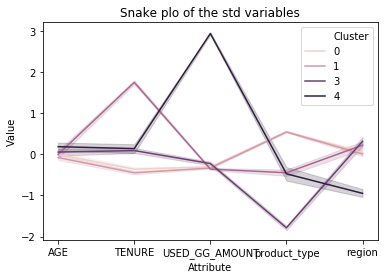

In [26]:
#transform data to prepare snakeplot for k=5
data_normalized = pd.DataFrame (data_normalized,
                               index = data2.index,
                               columns=data2.columns)
data_normalized['Cluster'] = data_k5['Cluster']

data_melt = pd.melt(data_normalized.reset_index(),
                   id_vars=['Cluster'],
                   value_vars = ('TENURE', 'AGE', 'USED_GG_AMOUNT', 'product_type', 'region'),
                    var_name='Attribute',
                    value_name='Value')

#snake plot
plt.title('Snake plo of the std variables')
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=data_melt)

In [27]:
#Experiment clusters based on the elbow k=6
kmeans = KMeans(n_clusters=6, random_state=1)
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_

data_k6 = data2.assign(Cluster = cluster_labels)
data_k6.groupby(['Cluster']).agg(
    ['mean', 'count']
)

TENURE              AGE       USED_GG_AMOUNT       product_type  \
               mean count       mean count           mean count         mean   
Cluster                                                                        
0         18.267267   333  33.249249   333     115.030030   333    22.918919   
1         45.915194   283  36.204947   283     403.886926   283    15.844523   
2        101.015228   394  33.964467   394     115.875635   394    16.088832   
3         28.812568   923  33.764897   923     120.270856   923    23.315276   
4         44.270732   410  34.500000   410     127.695122   410     6.312195   
5         29.573899   636  32.377358   636     120.754717   636    23.371069   

               location          region        
        count      mean count      mean count  
Cluster                                        
0         333  0.987988   333  5.165165   333  
1         283  0.618375   283  0.349823   283  
2         394  0.763959   394  2.862944   394  
3         923 -0.005417   923  2.459372   923  
4         410  0.568293   410  3.080488   410  
5         636  1.000000   636  1.025157   636

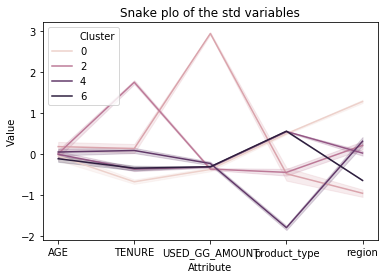

In [28]:
#transform data to prepare snakeplot for k=6
data_normalized = pd.DataFrame (data_normalized,
                               index = data2.index,
                               columns=data2.columns)
data_normalized['Cluster'] = data_k6['Cluster']

data_melt = pd.melt(data_normalized.reset_index(),
                   id_vars=['Cluster'],
                   value_vars = ('TENURE', 'AGE', 'USED_GG_AMOUNT', 'product_type', 'region'),
                    var_name='Attribute',
                    value_name='Value')

#snake plot
plt.title('Snake plo of the std variables')
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=data_melt)

In [29]:
#Relative importance of segment attributes k = 3
#the furher from 0, more important
cluster_avg = data_k3.groupby(['Cluster']).mean()
population_avg = data2.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,TENURE,AGE,USED_GG_AMOUNT,product_type,location,region
Cluster,,,,,,
0,0.75,0.01,-0.17,-0.43,0.18,0.25
1,0.12,0.07,1.74,-0.18,0.10,-0.85
2,-0.34,-0.02,-0.19,0.21,-0.09,0.02


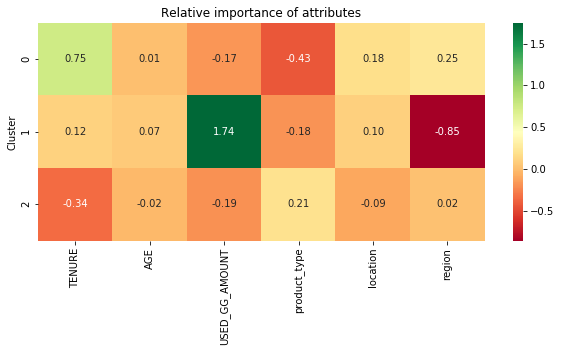

In [30]:
#Visually : heat map
plt.figure(figsize = (10,4))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

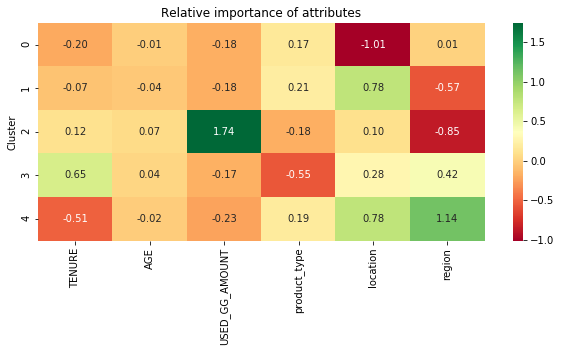

In [122]:
#Relative importance of segment attributes k = 5
#the furher from 0, more important
cluster_avg = data_k5.groupby(['Cluster']).mean()
population_avg = data2.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

#Visually : heat map
plt.figure(figsize = (10,4))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

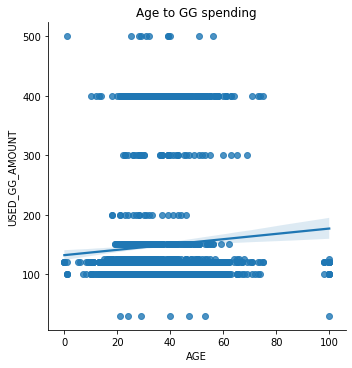

In [123]:
'''sns.scatterplot('TENURE', 'USED_GG_AMOUNT', data=data2);
plt.title('Age to USED_GG_AMOUNT, Colored by Tenure');'''

sns.lmplot('AGE', 'USED_GG_AMOUNT', data=data1);
plt.title('Age to GG spending');

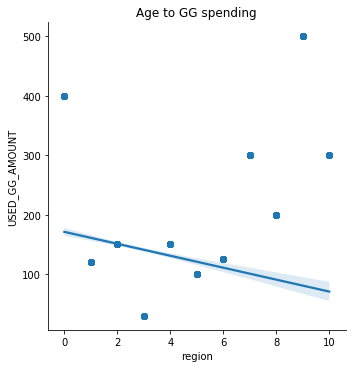

In [124]:
sns.lmplot('region', 'USED_GG_AMOUNT', data=data2);
plt.title('Age to GG spending');

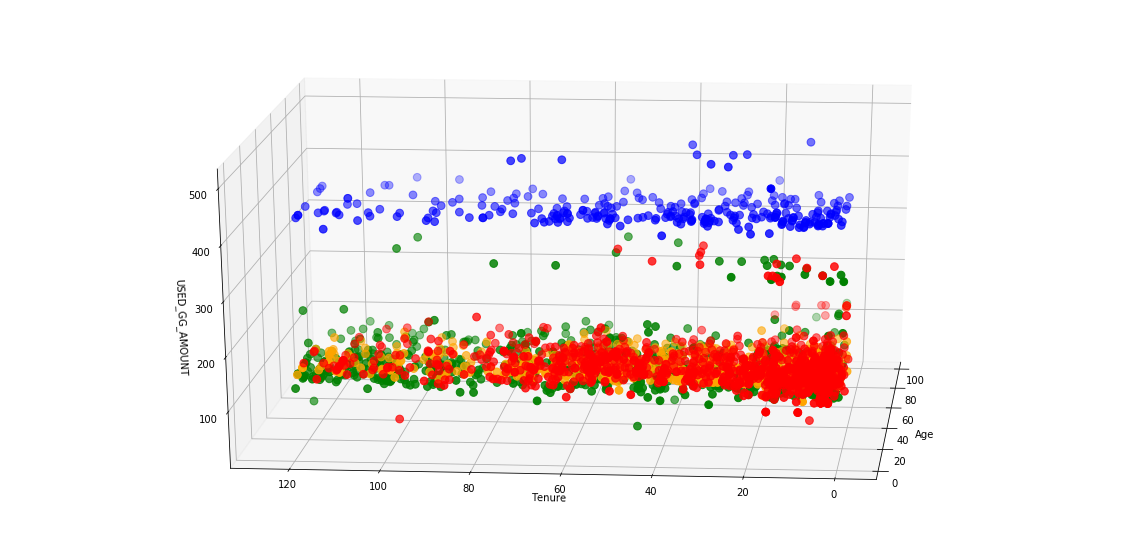

In [126]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(data_normalized)
data2["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2.AGE[data2.label == 0], data2["TENURE"][data2.label == 0], data2["USED_GG_AMOUNT"][data2.label == 0], c='blue', s=60)
ax.scatter(data2.AGE[data2.label == 1], data2["TENURE"][data2.label == 1], data2["USED_GG_AMOUNT"][data2.label == 1], c='red', s=60)
ax.scatter(data2.AGE[data2.label == 2], data2["TENURE"][data2.label == 2], data2["USED_GG_AMOUNT"][data2.label == 2], c='green', s=60)
ax.scatter(data2.AGE[data2.label == 3], data2["TENURE"][data2.label == 3], data2["USED_GG_AMOUNT"][data2.label == 3], c='orange', s=60)
#ax.scatter(data2.AGE[data2.label == 4], data2["TENURE"][data2.label == 4], data2["USED_GG_AMOUNT"][data2.label == 4], c='purple', s=60)
ax.view_init(20, 185)
plt.xlabel("Age")
plt.ylabel("Tenure")
ax.set_zlabel('USED_GG_AMOUNT')
plt.show()

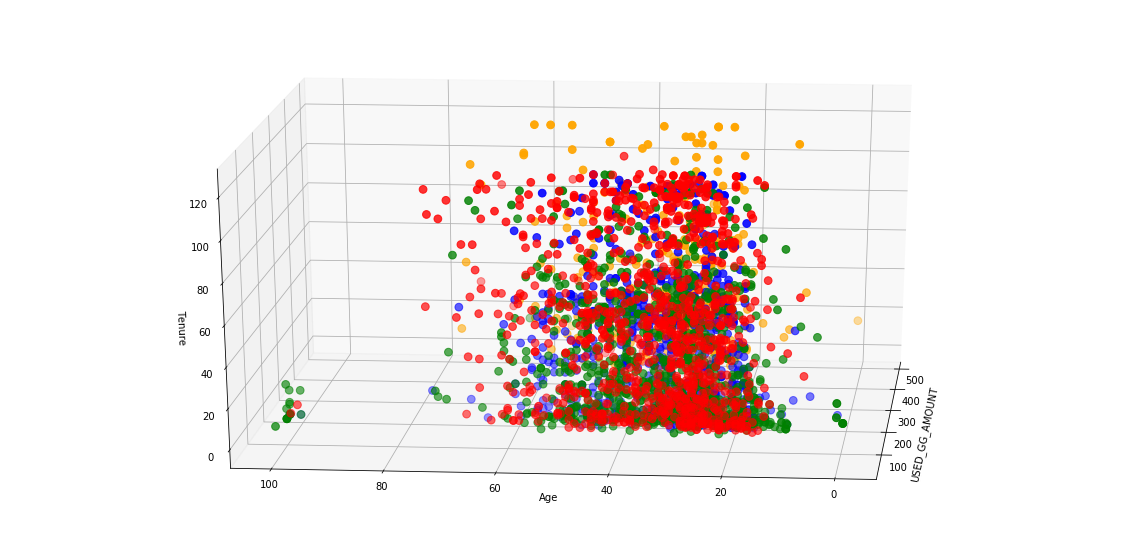

In [127]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(data_normalized)
data2["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2.USED_GG_AMOUNT[data2.label == 0], data2["AGE"][data2.label == 0], data2["TENURE"][data2.label == 0], c='blue', s=60)
ax.scatter(data2.USED_GG_AMOUNT[data2.label == 1], data2["AGE"][data2.label == 1], data2["TENURE"][data2.label == 1], c='red', s=60)
ax.scatter(data2.USED_GG_AMOUNT[data2.label == 2], data2["AGE"][data2.label == 2], data2["TENURE"][data2.label == 2], c='green', s=60)
ax.scatter(data2.USED_GG_AMOUNT[data2.label == 3], data2["AGE"][data2.label == 3], data2["TENURE"][data2.label == 3], c='orange', s=60)
#ax.scatter(data2.AGE[data2.label == 4], data2["TENURE"][data2.label == 4], data2["USED_GG_AMOUNT"][data2.label == 4], c='purple', s=60)
ax.view_init(20, 185)
plt.xlabel("USED_GG_AMOUNT")
plt.ylabel("Age")
ax.set_zlabel('Tenure')
plt.show()

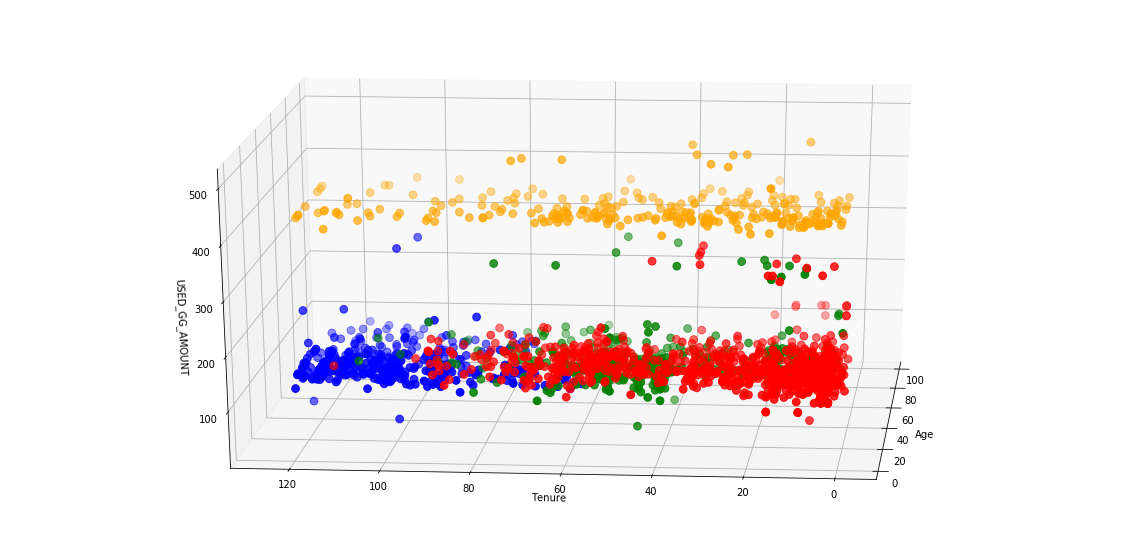

In [31]:
km = KMeans(n_clusters=6)
clusters = km.fit_predict(data_normalized)
data2["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2.AGE[data2.label == 0], data2["TENURE"][data2.label == 0], data2["USED_GG_AMOUNT"][data2.label == 0], c='blue', s=60)
ax.scatter(data2.AGE[data2.label == 1], data2["TENURE"][data2.label == 1], data2["USED_GG_AMOUNT"][data2.label == 1], c='red', s=60)
ax.scatter(data2.AGE[data2.label == 2], data2["TENURE"][data2.label == 2], data2["USED_GG_AMOUNT"][data2.label == 2], c='green', s=60)
ax.scatter(data2.AGE[data2.label == 3], data2["TENURE"][data2.label == 3], data2["USED_GG_AMOUNT"][data2.label == 3], c='orange', s=60)
#ax.scatter(data2.AGE[data2.label == 4], data2["TENURE"][data2.label == 4], data2["USED_GG_AMOUNT"][data2.label == 4], c='purple', s=60)
ax.view_init(20, 185)
plt.xlabel("Age")
plt.ylabel("Tenure")
ax.set_zlabel('USED_GG_AMOUNT')
plt.show()

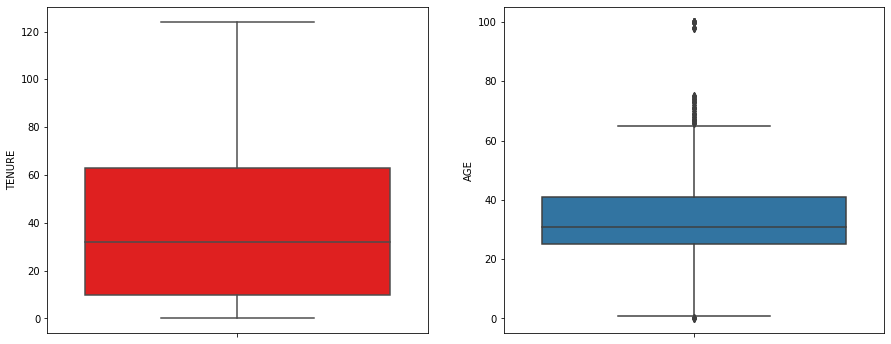

In [128]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=data1["TENURE"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=data1["AGE"])
plt.show()

In [5]:
print(data.GG_packages.unique())

['Сүлжээндээ 10 минут ярих ' '50МВ дата багц ашиглах'
 'Сүлжээндээ 30 минут ярих ' '200МВ дата ашиглах '
 'Unimusic 30 хоног ашиглах ' 'Сүлжээндээ 100 смс бичих '
 'Миний туслах 1 сар ашиглах' 'Сүлжээндээ 50 минут ярих '
 'Сүлжээндээ 300 смс бичих ' 'Сүлжээндээ 500 смс бичих '
 'Аялгуут мэндчилгээ 1 сар ашиглах ']


In [6]:
print(data.USED_GG_AMOUNT.unique())

[100 120 300 400 150 125 500 200  30]
